In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.initializers import Constant
from nltk.tokenize import word_tokenize
from nltk import TweetTokenizer
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)
from prettytable import PrettyTable
import warnings

warnings.filterwarnings('ignore')
from src.contractions import expandContractions

ModuleNotFoundError: No module named 'sklearn'

In [5]:
import re
cList = {
  "ain’t": "am not",
  "aren’t": "are not",
  "can’t": "cannot",
  "can’t’ve": "cannot have",
  "’cause": "because",
  "could’ve": "could have",
  "couldn’t": "could not",
  "couldn’t’ve": "could not have",
  "didn’t": "did not",
  "doesn’t": "does not",
  "don’t": "do not",
  "hadn’t": "had not",
  "hadn’t’ve": "had not have",
  "hasn’t": "has not",
  "haven’t": "have not",
  "he’d": "he would",
  "he’d’ve": "he would have",
  "he’ll": "he will",
  "he’ll’ve": "he will have",
  "he’s": "he is",
  "how’d": "how did",
  "how’d’y": "how do you",
  "how’ll": "how will",
  "how’s": "how is",
  "i’d": "i would",
  "i’d’ve": "i would have",
  "i’ll": "i will",
  "i’ll’ve": "i will have",
  "i’m": "i am",
  "i’ve": "i have",
  "isn’t": "is not",
  "it’d": "it had",
  "it’d’ve": "it would have",
  "it’ll": "it will",
  "it’ll’ve": "it will have",
  "it’s": "it is",
  "let’s": "let us",
  "ma’am": "madam",
  "mayn’t": "may not",
  "might’ve": "might have",
  "mightn’t": "might not",
  "mightn’t’ve": "might not have",
  "must’ve": "must have",
  "mustn’t": "must not",
  "mustn’t’ve": "must not have",
  "needn’t": "need not",
  "needn’t’ve": "need not have",
  "o’clock": "of the clock",
  "oughtn’t": "ought not",
  "oughtn’t’ve": "ought not have",
  "shan’t": "shall not",
  "sha’n’t": "shall not",
  "shan’t’ve": "shall not have",
  "she’d": "she would",
  "she’d’ve": "she would have",
  "she’ll": "she will",
  "she’ll’ve": "she will have",
  "she’s": "she is",
  "should’ve": "should have",
  "shouldn’t": "should not",
  "shouldn’t’ve": "should not have",
  "so’ve": "so have",
  "so’s": "so is",
  "that’d": "that would",
  "that’d’ve": "that would have",
  "that’s": "that is",
  "there’d": "there had",
  "there’d’ve": "there would have",
  "there’s": "there is",
  "they’d": "they would",
  "they’d’ve": "they would have",
  "they’ll": "they will",
  "they’ll’ve": "they will have",
  "they’re": "they are",
  "they’ve": "they have",
  "to’ve": "to have",
  "wasn’t": "was not",
  "we’d": "we had",
  "we’d’ve": "we would have",
  "we’ll": "we will",
  "we’ll’ve": "we will have",
  "we’re": "we are",
  "we’ve": "we have",
  "weren’t": "were not",
  "what’ll": "what will",
  "what’ll’ve": "what will have",
  "what’re": "what are",
  "what’s": "what is",
  "what’ve": "what have",
  "when’s": "when is",
  "when’ve": "when have",
  "where’d": "where did",
  "where’s": "where is",
  "where’ve": "where have",
  "who’ll": "who will",
  "who’ll’ve": "who will have",
  "who’s": "who is",
  "who’ve": "who have",
  "why’s": "why is",
  "why’ve": "why have",
  "will’ve": "will have",
  "won’t": "will not",
  "won’t’ve": "will not have",
  "would’ve": "would have",
  "wouldn’t": "would not",
  "wouldn’t’ve": "would not have",
  "y’all": "you all",
  "y’alls": "you alls",
  "y’all’d": "you all would",
  "y’all’d’ve": "you all would have",
  "y’all’re": "you all are",
  "y’all’ve": "you all have",
  "you’d": "you had",
  "you’d’ve": "you would have",
  "you’ll": "you you will",
  "you’ll’ve": "you you will have",
  "you’re": "you are",
  "you’ve": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())

In [1]:
MAX_SEQUENCE_LENGTH = 140
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 25

In [7]:
# Load Dataset
file_location = "/content/gdrive/My Drive/Shruti/depression_dataset.csv"
tweets_data =  pd.read_csv(file_location, delimiter="|",  error_bad_lines=False)
tweets_data.head()

b'Skipping line 3: expected 4 fields, saw 8\nSkipping line 14: expected 4 fields, saw 6\nSkipping line 18: expected 4 fields, saw 6\nSkipping line 20: expected 4 fields, saw 6\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 34: expected 4 fields, saw 8\nSkipping line 35: expected 4 fields, saw 6\nSkipping line 45: expected 4 fields, saw 8\nSkipping line 46: expected 4 fields, saw 6\nSkipping line 48: expected 4 fields, saw 6\nSkipping line 49: expected 4 fields, saw 8\nSkipping line 53: expected 4 fields, saw 6\nSkipping line 57: expected 4 fields, saw 8\nSkipping line 68: expected 4 fields, saw 6\nSkipping line 72: expected 4 fields, saw 6\nSkipping line 75: expected 4 fields, saw 6\nSkipping line 83: expected 4 fields, saw 6\nSkipping line 85: expected 4 fields, saw 6\nSkipping line 87: expected 4 fields, saw 8\nSkipping line 88: expected 4 fields, saw 6\nSkipping line 98: expected 4 fields, saw 6\nSkipping line 103: expected 4 fields, saw 6\nSkipping line 117: expected 4 

,Date,user,tweet,label
0,Tue Apr 07 00:21:53 PDT 2009,J_Moneyy,i don't wanna leave CO! 4:15 am is coming too ...,0
1,Tue Apr 07 00:22:10 PDT 2009,CassetteCoast,Power to levitate?.... still negative.,0
2,Tue Apr 07 00:22:28 PDT 2009,xallthatjazzx,Trying really hard not to get sick from all of...,0
3,Tue Apr 07 00:22:31 PDT 2009,momokitty,back from the casino a big fat loser!,0
4,Tue Apr 07 00:22:36 PDT 2009,Damn_Knit_Blast,Even a four day week seems too long I want to...,0


In [8]:
def processTweet(tweet):
    _stopwords = ['AT_USER', 'URL', 'RT', 'rt', 'at_user', 'url', "depress", "feeling down", "suicidal", "depressed", "depression"]
    tweet = tweet.lower()  # convert text to lower-case
    tweet = expandContractions(tweet)
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)  # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet)  # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)  # remove the # in #hashtag
    tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)
    tweet = tokenizer.tokenize(tweet)
    # remove the stop words from the tokenzied tweet
    tweet = [word for word in tweet if word not in _stopwords]
    tweet = ' '.join(tweet)
    return tweet

In [9]:
corpus = tweets_data["tweet"].apply(processTweet)
# corpus = tweets_data["tweet"]
label = list(tweets_data["label"])
# all_words = []
# for text in corpus:
#   tokenize_text = processTweet(text)
#   for word in tokenize_text:
#     all_words.append(word)

# xtrain, xvalid, ytrain, yvalid = train_test_split(corpus, labels[0:22000], random_state=42, test_size=0.3)
# corpus[-10:]
# type(corpus)

In [10]:
'''
corpus = tweets_data["Processed"][:4]
all_words =[]
for sentence in corpus:
  for word in sentence:
    all_words.append(word)
# print(all_words[:10])
unique_words = set(all_words)
print(len(unique_words))
# # print(unique_words)
vocab_length = len(unique_words) + 1
'''

word_tokenizer = Tokenizer(MAX_NUM_WORDS, lower=True)
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
word_index = word_tokenizer.word_index

In [11]:
# word_tokenizer = Tokenizer()
# word_tokenizer.fit_on_texts(corpus)
# vocab_length = len(word_tokenizer.word_index) + 1
# vocab_length

# label[:10]

In [12]:
# embedded_sentences = word_tokenizer.texts_to_sequences(corpus)
# print(embedded_sentences)

sequences = word_tokenizer.texts_to_sequences(corpus)
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
# from nltk.tokenize import word_tokenize
# word_count = lambda sentence: len(word_tokenize(sentence))
# longest_sentence = max(corpus, key=word_count)
# length_long_sentence = len(word_tokenize(longest_sentence))
# padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
# print(padded_sentences)

In [15]:
#load embeddings
embedding_dictionary_file = "/content/gdrive/My Drive/Depression/Glove_25_d.pickle"
# embedding_dictionary_file = "/content/gdrive/My Drive/Depression/AffectVec-v1.0/AffectVec.pickle"
with open(embedding_dictionary_file, 'rb') as handle:
    embedding_dictionary = pickle.load(handle)
# embedding_size = len(embedding_dictionary["hello"])
# print(embedding_size)

In [16]:
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
# print(embedding_dictionary)
for word, index in word_tokenizer.word_index.items():
  if index >= MAX_NUM_WORDS:
        continue
  embedding_vector = embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [21]:
xtrain, xvalid, ytrain, yvalid = train_test_split(data, label, random_state=42, test_size=0.3, shuffle=True)
xtrain, xvalid, ytrain, yvalid = np.asarray(xtrain), np.asarray(xvalid), np.asarray(ytrain), np.asarray(yvalid) 

In [22]:
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [23]:
# model = Sequential()
# embedding_layer = Embedding(vocab_length, embedding_size, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False)
# model.add(embedding_layer)
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.7))
# model.add(LSTM(units=150))
# model.add(Dropout(0.7))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

model = Sequential()
# model.add(Embedding(vocab_length, embedding_size, weights=[embedding_matrix], input_length=5000, trainable = False))
model.add(embedding_layer)
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 25)           500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 140, 32)           2432      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 555,733
Trainable params: 555,733
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# best_model_file = "./weights.Depression.Affect.best.hdf5"
best_model_file = "./gdrive/My Drive/Depression/weights.Depression.Glove25.best.hdf5"
checkpoint = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(xtrain, ytrain, epochs=3, validation_split=0.33, batch_size=64, callbacks=callbacks_list, verbose=1)

Epoch 1/3
131/132 [============================>.] - ETA: 0s - loss: 0.4719 - accuracy: 0.7630
Epoch 00001: val_accuracy improved from -inf to 0.80348, saving model to ./gdrive/My Drive/Depression/weights.Depression.Glove25.best.hdf5
132/132 [==============================] - 12s 93ms/step - loss: 0.4718 - accuracy: 0.7630 - val_loss: 0.3988 - val_accuracy: 0.8035
Epoch 2/3
131/132 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8404
Epoch 00002: val_accuracy improved from 0.80348 to 0.82672, saving model to ./gdrive/My Drive/Depression/weights.Depression.Glove25.best.hdf5
132/132 [==============================] - 12s 92ms/step - loss: 0.3530 - accuracy: 0.8405 - val_loss: 0.3762 - val_accuracy: 0.8267
Epoch 3/3
131/132 [============================>.] - ETA: 0s - loss: 0.2968 - accuracy: 0.8719
Epoch 00003: val_accuracy improved from 0.82672 to 0.83470, saving model to ./gdrive/My Drive/Depression/weights.Depression.Glove25.best.hdf5
132/132 [=================

In [25]:
model.load_weights(best_model_file)
scores = model.evaluate(xvalid, yvalid, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.97%


In [26]:
pred = model.predict_classes(xvalid, batch_size=32, verbose=1)
# predicted = np.argmax(pred, axis=1)
from sklearn.metrics import precision_score
report = precision_score(yvalid, pred)
print(report)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
168/168 [==============================] - 2s 14ms/step
0.7558187015108208


In [27]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3253
           1       0.76      0.88      0.81      2113

    accuracy                           0.84      5366
   macro avg       0.83      0.85      0.84      5366
weighted avg       0.85      0.84      0.84      5366



In [28]:
covid_file = "/content/gdrive/My Drive/Depression/tweet_calulation.csv"
covid_data = pd.read_csv(covid_file)
covid_data["just_date"] = pd.to_datetime(covid_data['Date']).dt.normalize()

In [29]:
new_covid_data = pd.DataFrame({"date": covid_data["just_date"], "tweet": covid_data["Tweet"]})

In [ ]:
# tweet = "The positive way you’re dealing with your isolation in a tropical 🏝 paradise, aside... I have a feeling you can’t wait to walk down the aisle. Hang in there, gorgeous."
# tweet = processTweet(tweet)
# # print(tweet)

In [30]:
tweets = new_covid_data["tweet"].apply(processTweet)

In [31]:
# new_covid_data.head()
sequences = word_tokenizer.texts_to_sequences(tweets)
# print(sequences[:2])
print(word_tokenizer.sequences_to_texts(sequences[:1]))
covid_tweets_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

["that's huge thank you"]


In [32]:
tweets.head()

0          that's huge ! thank you universalpictures !
1    “ whole of government approach ? ! ” apparentl...
2      thread more racist bs from the usual suspects .
3                                        truly crazy .
4    am i the only one who heard this hysterical li...
Name: tweet, dtype: object

In [33]:
predictions = model.predict_classes(covid_tweets_padded, batch_size=32, verbose=1)

2114/2114 [==============================] - 31s 15ms/step


In [34]:
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

{0: 11189, 1: 56435}

In [35]:
predictions[-10:]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [36]:
covid_data["predictions"] = np.array(predictions)


In [37]:
time_series = covid_data.groupby(['just_date', 'predictions'])['predictions'].agg(
        lambda x: x.value_counts())
time_series_percentage = time_series.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(
        name='count')

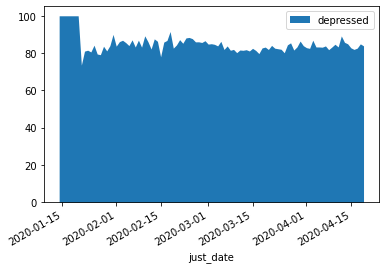

In [38]:
mask = time_series_percentage["predictions"]==1
depression = time_series_percentage[mask]
depression.plot.area(x="just_date", y="count", linewidth=0.0, label="depressed")